### Importing the data and the functions

In [1]:
include("importData.jl")
include("DDEmodel.jl")
include("Hill.jl")
include("ODEmodel.jl")
include("plot.jl")

# population data, g2 data, g1 data, initial number of cells in g1, initial number of cells in g2
# lapatinib
conc_l, pop_l, g2_l, g1_l, g2_0_l, g1_0_l = setup_data("lapatinib");

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:37


### A) cartoon 

In [2]:
# It is plotA.svg 

### B) ODE fitting of Lapatinib data

In [3]:
# initial values
p = [8.870525324, 8.492087169, 0.43447323, 7.67847790]

# setting lowest delay for tau1 to be half an hour and for tau2 to be 3 hours.
low = 0.0001*ones(4)
upp = 0.1*ones(4)
params_ode = zeros(4, 8)

# ODE optimization and estimation of the parameters
for i in 1:8
    params_ode[:, i] = ODEoptimizer(low, upp, p, i, g1_l, g2_l, g1_0_l, g2_0_l)
end

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = ode_plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String, ::Bool) at ODEmodel.jl:57
└ @ Main /home/farnazm/dde/plots/DrugResponseModel.jl/src/ODEmodel.jl:57
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = ode_plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String, ::Symbol) at ODEmodel.jl:57
└ @ Main /home/farnazm/dde/plots/DrugResponseModel.jl/src/ODEmodel.jl:57


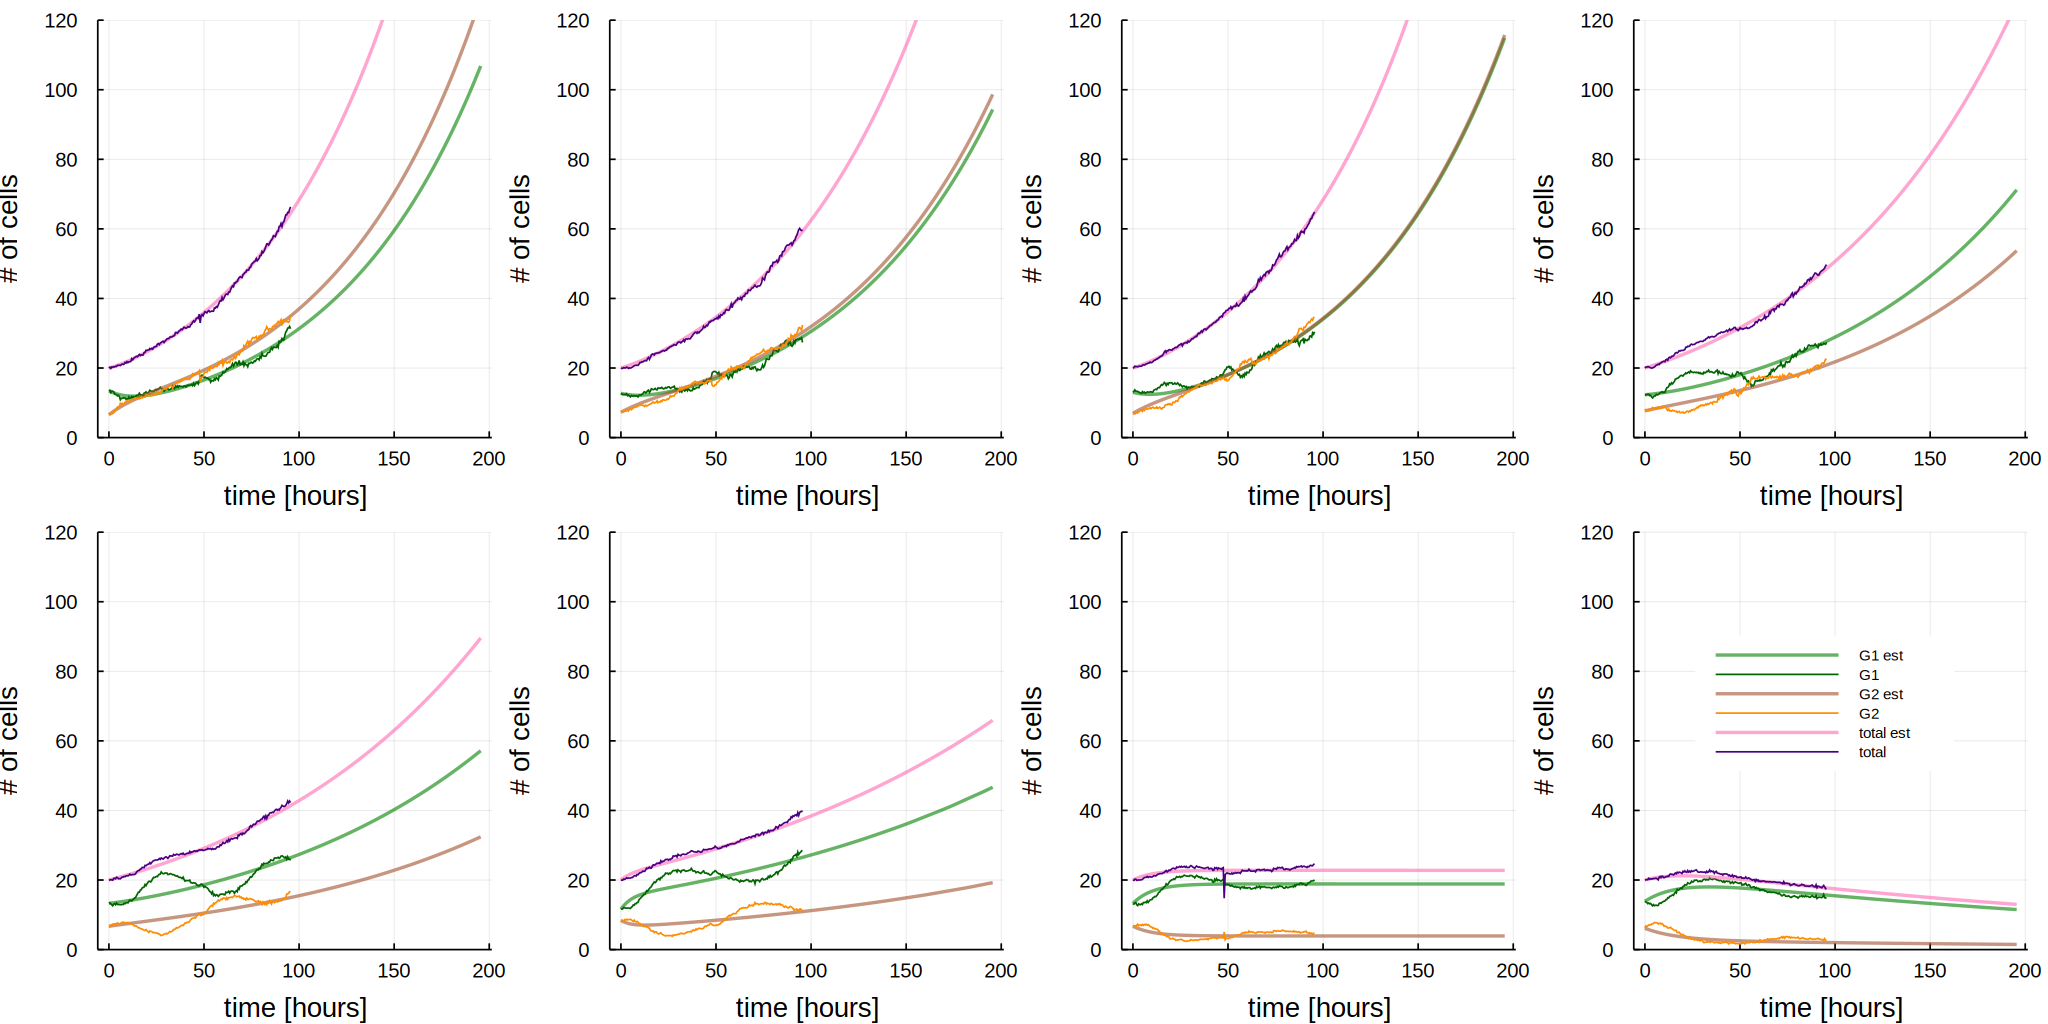

In [4]:
ODEplot_all(params_ode, g1_l, g2_l, g1_0_l, g2_0_l, pop_l)

### F) DDE fitting for lapatinib

In [5]:
# initial guess
initial_guess  = [0.02798, 0.025502, 15.3481, 15.2881, 0.001, 0.001]

# bounds 
lower_bnd = [-6.0, -6.0, 1.0, 1.0, -10.0, -10.0]
upper_bnd = [0.0, 0.0, 6.0, 6.0, 0.0, 0.0]

# max number of steps
maxSteps = 10000
parameters = zeros(6,8)
for j in 1:8
    println("#################### trial number $j #########################")
    best_fit, parameters[:,j] = optimization(g1_l, g2_l, g1_0_l, g2_0_l, initial_guess, j, lower_bnd, upper_bnd, maxSteps)
    println(best_fit)
end

#################### trial number 1 #########################
308.28311071696623
#################### trial number 2 #########################
302.5407832291235
#################### trial number 3 #########################
647.0225136755846
#################### trial number 4 #########################
448.87525741265495
#################### trial number 5 #########################
558.8441471854521
#################### trial number 6 #########################
99.51707856270313
#################### trial number 7 #########################
152.08219006422243
#################### trial number 8 #########################
231.45839606968448


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Bool, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/dde/plots/DrugResponseModel.jl/src/plot.jl:29
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/dde/plots/DrugResponseModel.jl/src/plot.jl:29


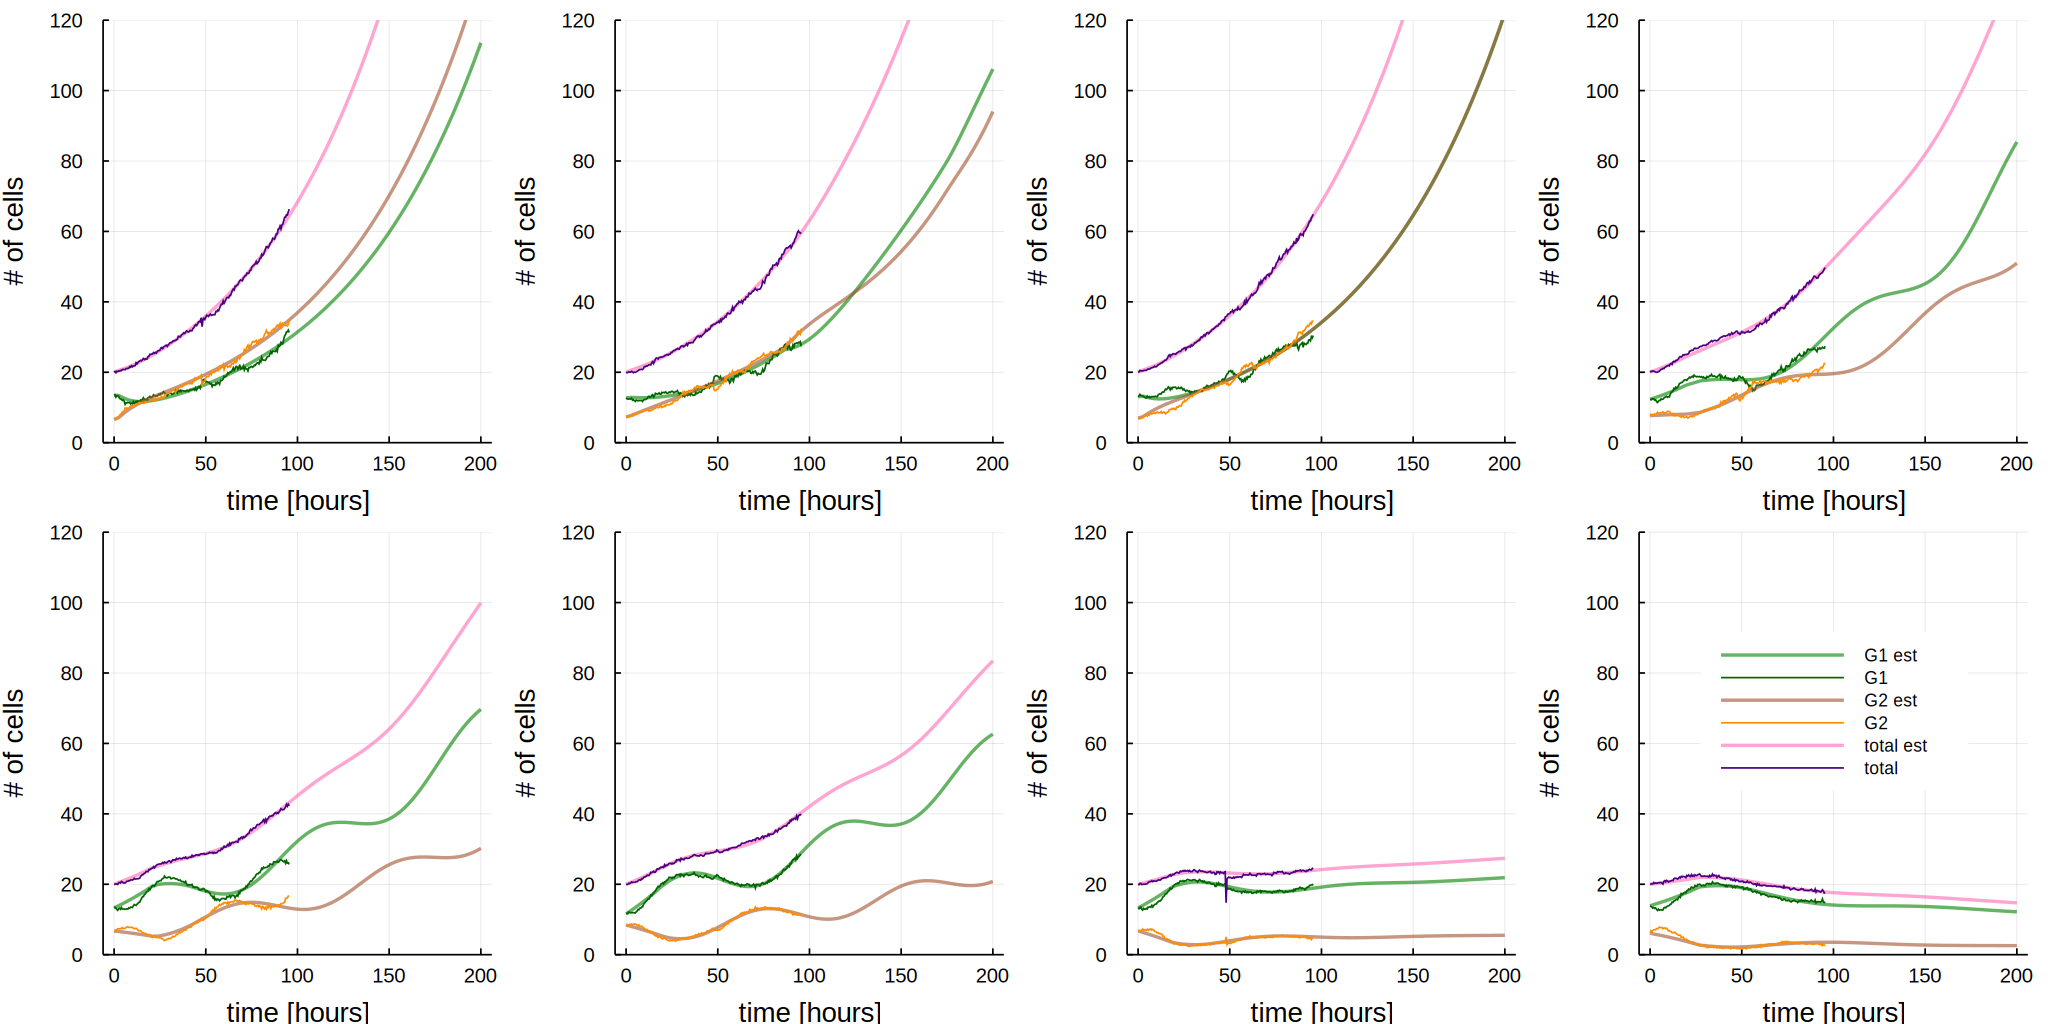

In [12]:
plot_all(parameters, pop_l, g2_l, g1_l, g2_0_l, g1_0_l)

### G) DDE parameters for lapatinib

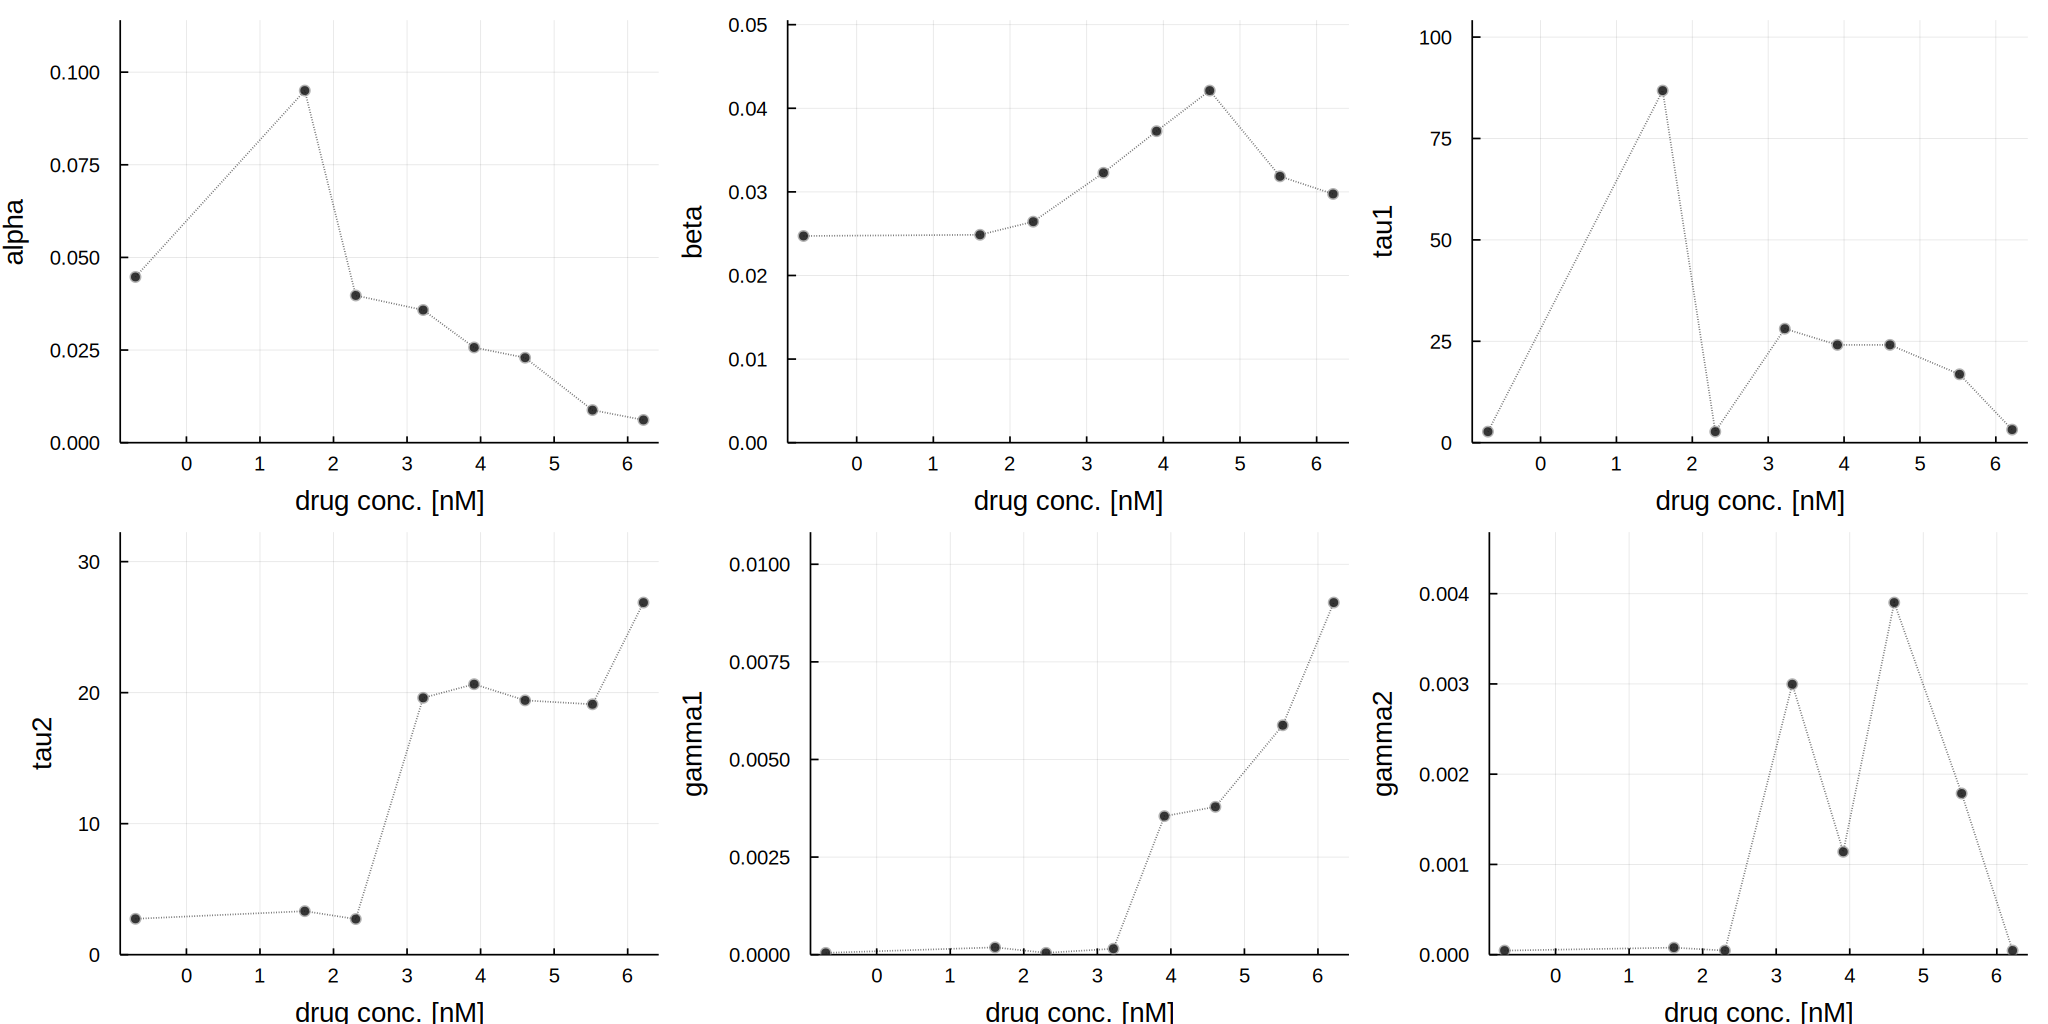

In [22]:
plot_parameters(conc_l, parameters)

### H) DDE Hill fitting 

In [16]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, gamma1_max, gamma2_max]
guess = [125.0, 0.4, 0.007, 0.005, 0.007, 0.005, 39.0, 30.0, 11.0, 20.0, 0.003, 0.02]
# max num of steps
num_steps=500

# optimize and return the estimated hill parameters
best_fit, params = optimize_hill(guess, conc_l, g1_l, g2_l, g1_0_l, g2_0_l, num_steps)

# easy way to convert the hill parameters to DDE parameters
p = getDDEparams(params, conc_l)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
50.08 secs, 329 evals, 236 steps, improv/step: 0.428 (last = 0.4280), fitness=41584.024792737

Optimization stopped after 501 steps and 92.08 seconds
Termination reason: Max number of steps (500) reached
Steps per second = 5.44
Function evals per second = 6.57
Improvements/step = 0.36200
Total function evaluations = 605


Best candidate found: [150.502, 0.01, 0.00561282, 0.0562557, 0.0895945, 0.0270399, 22.3778, 34.8832, 8.8228, 7.6588, 0.00623689, 0.0966896]

Fitness: 31666.021925856



6×8 Array{Float64,2}:
  0.0547206     0.0545397    0.0543382    …   0.0102653    0.00562902
  0.0289361     0.0291596    0.0294084        0.0838477    0.0895745 
 34.5041       34.4594      34.4097          23.5267      22.3818    
  7.69408       7.69824      7.70287          8.71587      8.82243   
  0.000189053   0.00021134   0.000236151      0.00566392   0.0062349 
  0.00293087    0.00327637   0.00366101   …   0.0878069    0.0966587 

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Bool, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/dde/plots/DrugResponseModel.jl/src/plot.jl:29
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/dde/plots/DrugResponseModel.jl/src/plot.jl:29


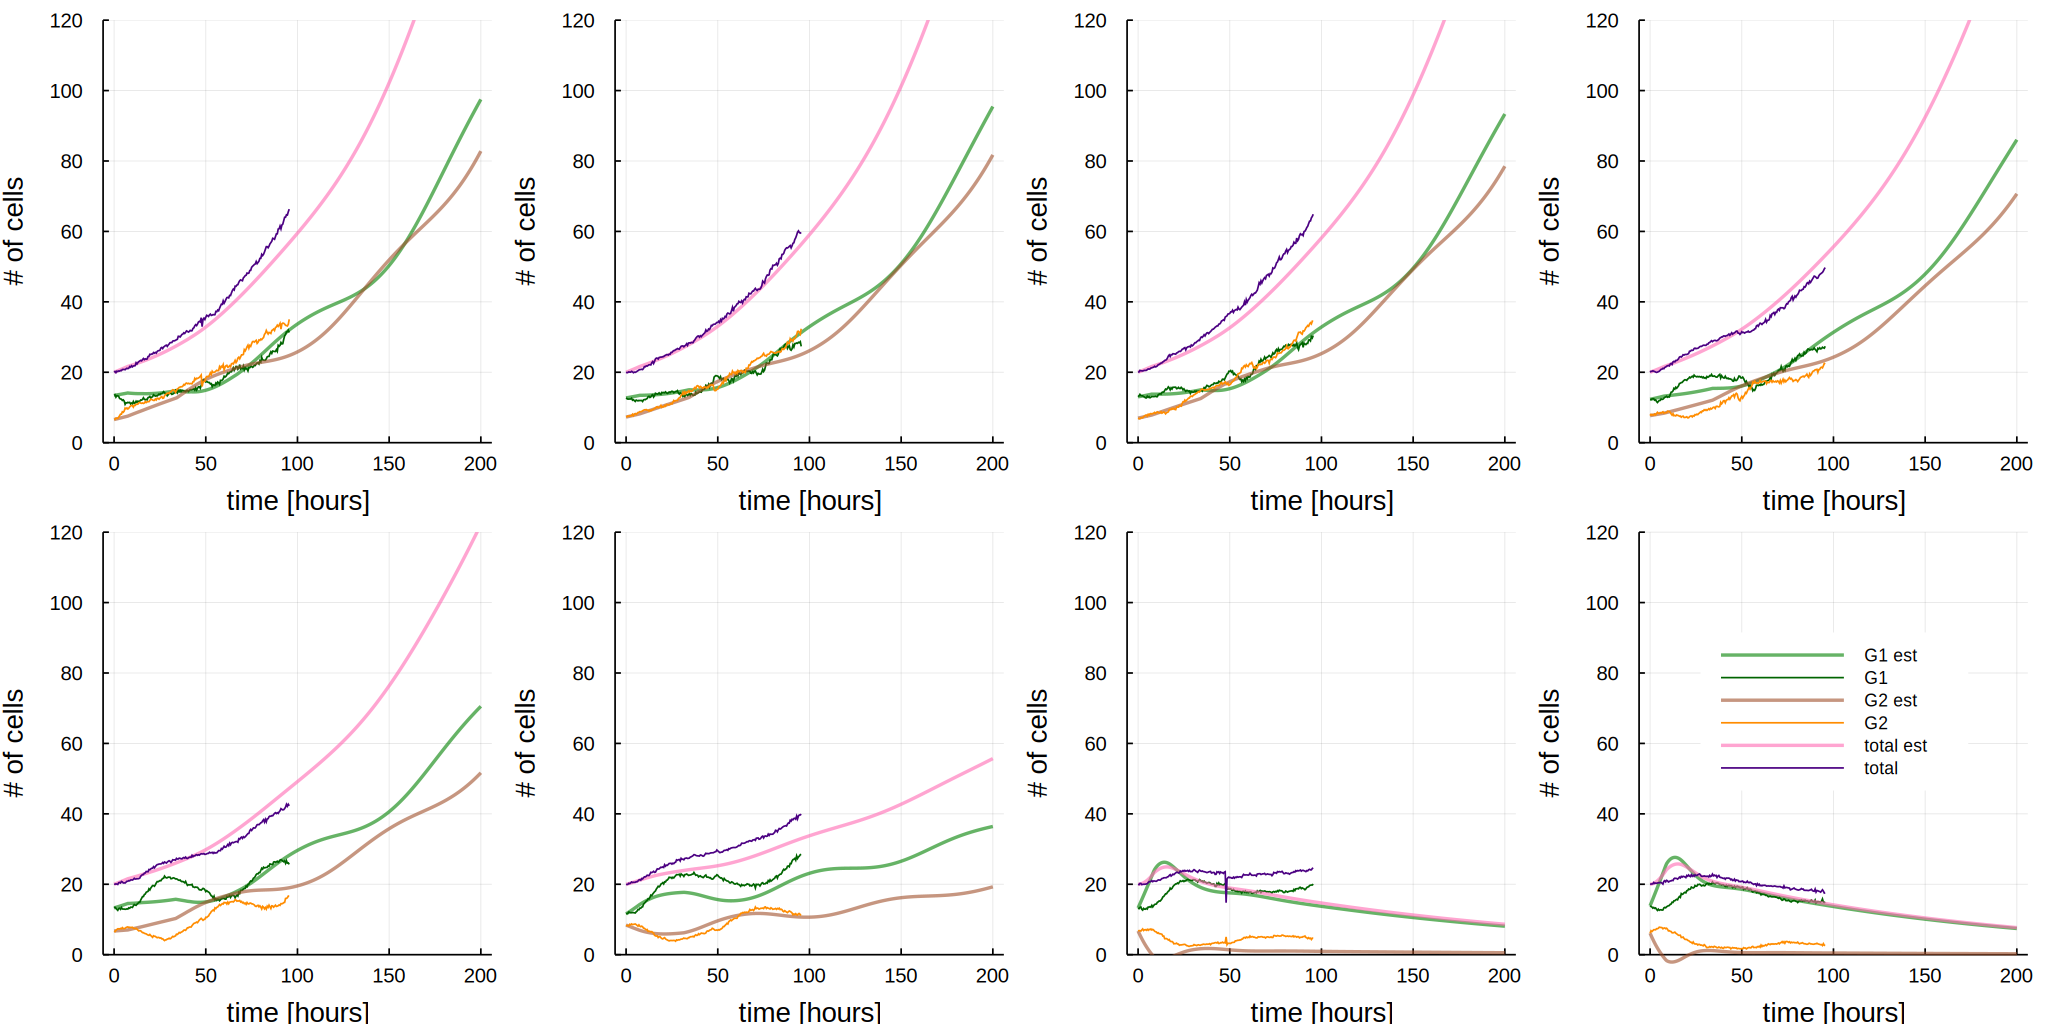

In [20]:
plot_all(p, pop_l, g2_l, g1_l, g2_0_l, g1_0_l)

### I) DDE Hill Parameters

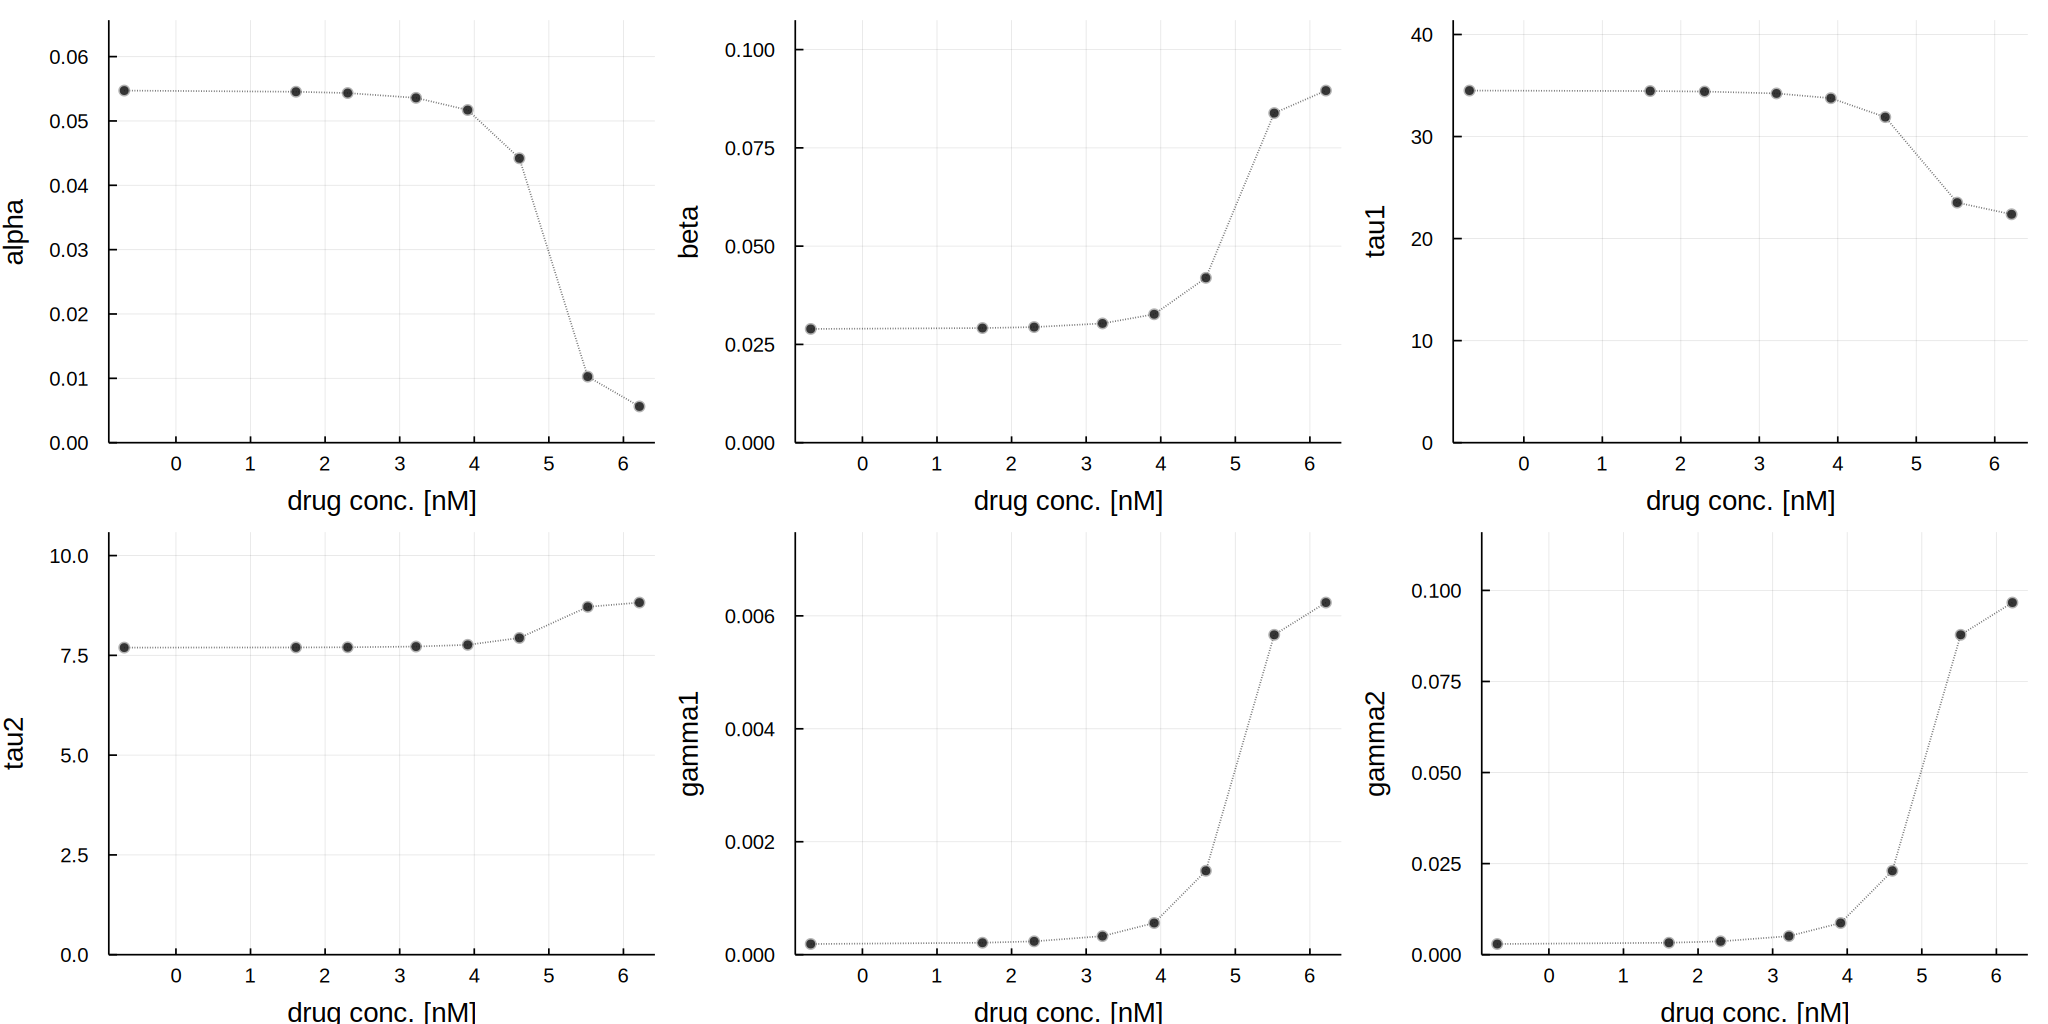

In [18]:
plot_parameters(conc_l, p)

### The phase portrait of G1 and G2 data

In [19]:
# lapatinib
include("plot.jl")
labels = ["control", "conc. 5nM", "conc. 10nM", "conc. 25nM", "conc. 50nM", "conc. 100nM", "conc. 250nM", "conc. 500nM"]
xlabel = "G1 numbers"
ylabel = "G2 numbers"
ymax = 40
correlationPlot(g1_l, g2_l, labels, xlabel, ylabel, ymax)